In [1]:
import pandas as pd
import numpy as np
import pathlib as pl
import sklearn
import pathlib as pl

In [2]:
dictionarypath = '../dataset/dictionary/Loughran-McDonald_MasterDictionary_1993-2021.csv'
wds_dict = pd.read_csv(dictionarypath)
positive_wds = [row['Word'].lower() for i, row in wds_dict.iterrows() if row['Positive']!=0]
negative_wds = [row['Word'].lower() for i, row in wds_dict.iterrows() if row['Negative']!=0]

In [14]:
# path = '../dataset/finRep/FinancialPhraseBank/all-data.csv'
# df = pd.read_csv(path, encoding = "ISO-8859-1", names = ['sentiment', 'sentence'])
# # print(df[:10])
path = '../dataset/finRep/FiQA/fiqa_extended.csv'
df = pd.read_csv(path, encoding = "ISO-8859-1")

df['sentiment_score'] = np.where((df['sentiment_score'] < 0.5 ) & (df['sentiment_score'] > -0.5), 0, df['sentiment_score'])
df['sentiment_score'] = np.where((df['sentiment_score'] >= 0.5 ), 1, df['sentiment_score'])
df['sentiment_score'] = np.where((df['sentiment_score'] <= -0.5 ), -1, df['sentiment_score'])
df['sentiment_score'] = df['sentiment_score'].astype(int)
df

,title,body,links,source,target,sentiment_score
0,Dairy Crest loses a third of Morrisons milk co...,(Reuters) - Dairy Crest Group Plc DCG.L lost a...,https://www.reuters.com/article/uk-dairy-crest...,www.reuters.com,Morrisons,0
1,Pearson expects to return to growth this year,LONDON (Reuters) - Pearson PSON.L said it expe...,https://www.reuters.com/article/uk-pearson-res...,www.reuters.com,Pearson,0
2,"FDA approves NPS drug, in move validating Shir...",Jan 23 (Reuters) - The U.S. Food and Drug Admi...,https://www.reuters.com/article/fda-nps-pharma...,www.reuters.com,Shire,0
3,Shire to buy NPS for $5.2 billion to boost rar...,LONDON (Reuters) - Shire Plc has agreed to buy...,https://www.reuters.com/article/us-nps-m-a-shi...,www.reuters.com,Shire,0
4,"UPDATE 1-Just the ticket, Trainline shares sur...",* Trainline valued at 1.68 bln pounds in Londo...,https://www.reuters.com/article/trainline-list...,www.reuters.com,Thetrainline.com,0
...,...,...,...,...,...,...
197,U.K. Stocks Little Changed as Barclays Gain Of...,\nU.K. stocks were little changed as gains in ...,https://www.bloomberg.com/news/articles/2014-1...,www.bloomberg.com,Shell,-1
198,ShellÂs $70 billion BG deal meets shareholder...,\nLondon/New Delhi: The biggest deal in Royal ...,https://www.livemint.com/Companies/TyrP7qjLuKn...,www.livemint.com,Shell,0
199,City spirits sink after Diageo comes up short ...,Hopes of a sales rebound at Diageo at the star...,https://www.independent.co.uk/news/business/ne...,www.independent.co.uk,Diageo,-1
200,Diageo receives reports from United Spirits on...,MUMBAI: British drinks major Diageo Â also th...,https://m.economictimes.com/industry/cons-prod...,m.economictimes.com,Diageo,0


-1     20
 1     25
 0    157
Name: sentiment_score, dtype: int64

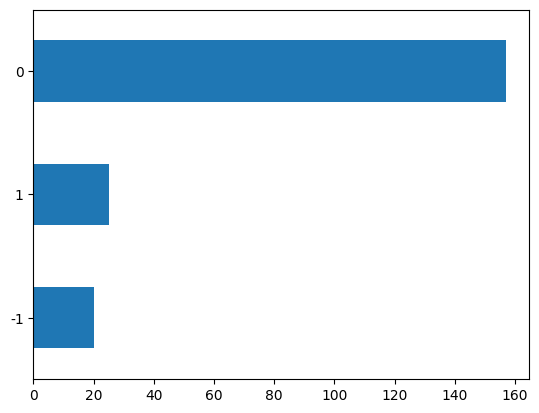

In [16]:
df.sentiment_score.value_counts().sort_values().plot(kind = 'barh')
df.sentiment_score.value_counts().sort_values()

In [47]:
# to install keybert
# !pip install nltk
# !pip install keybert
# !pip install sentence-transformers
# !pip install git+https://github.com/LIAAD/yake
### To show the execution times
# !pip install ipython-autotime
# %load_ext autotime

In [48]:
import re

text = df.sample(1).iloc[0]['body']
text = re.sub(r'[^A-Za-z0-9 .,;]+', '', text)
text = re.sub(' +', ' ', text)
# df =df.drop(index = 0)
    # df[:3]
print(text)
label = df.sample(1)['sentiment_score'].iloc[0]

print("the sentiment is : %s"%label)

WASHINGTON Reuters AstraZeneca Plcs diabetes drug Onglyza and Takeda Pharmaceutical Co.s rival product Nesina should carry information about the risk of heart failure, an advisory committee to the U.S. Food and Drug Administration said on Tuesday.Heart failure is a condition in which the heart cannot pump enough blood to meet the bodys needs. It can be caused by coronary artery disease, high blood pressure, diabetes or obesity, according to the Mayo Clinic.The panel reviewed safety data on AstraZenecas Onglyza and Takedas Nesina. The drugs belong to a class known as DPP4 inhibitors which also includes Merck Co.s Januvia. Januvia data from a trial known as TECOS will be presented at a scientific meeting in June.The studies were requested by the FDA as part of a broader investigation into the safety of diabetes drugs. In December 2008, the agency issued guidance requiring companies to conduct studies to show the drugs did not increase cardiovascular risk.The panel found that neither Ongl

In [49]:
def normalize_keyword_list(keyword_list):
    keys = []
    for keyword in keyword_list:
        keys.append(keyword[0])
    return keys

Rake

In [50]:
from rake_nltk import Rake
rake_nltk_var = Rake()

rake_nltk_var.extract_keywords_from_text(text)
rake_keywords = rake_nltk_var.get_ranked_phrases()
print(rake_keywords)

['washington reuters astrazeneca plcs diabetes drug onglyza', 'agency issued guidance requiring companies', 'leerink analyst seamus fernandez said', 'heart cannot pump enough blood', 'mercks shares rose 1', 'also includes merck co', 'panel reviewed safety data', 'heart failure risk seen', 'drug administration said', 'high blood pressure', 'shares rose 3', 'takeda pharmaceutical co', 'therefore worth including', 'takedas shares closed', 'reach statistical significance', 'coronary artery disease', 'serious safety issue', 'statistically significant increase', 'panel members said', 'overtly negative signal', 'current prescribing trends', 'rival product nesina', 'preliminary fda review', 'dpp4 class effect', 'takedas nesina suggests', 'increase cardiovascular risk', 'heart failure', 'heart failure', 'heart failure', 'known also', 'heart attack', 'diabetes drugs', 'panelists said', 'dpp4 class', 'data showed', 'takedas nesina', 'panel found', 'onglyza published', 'neither onglyza', 'either o

In [51]:
# Import them
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
sent_trans = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
keyBERT_model = KeyBERT(model = sent_trans)

In [52]:
def extract_terms(document, n_gram_range = (3,3), 
                  top_N=5, model=keyBERT_model, diversity_threshold = 0.7):

  keywords = model.extract_keywords(document, stop_words='english', 
                                    keyphrase_ngram_range=(1, 3),
                                    use_mmr=True, 
                                    diversity = diversity_threshold,
                                    top_n = top_N)
  
  return sorted(keywords, key=lambda tup:(-tup[1], tup[0]))

In [54]:
# print(f'Text: {text}.\nLength: {len(text.split())}')
keybert_keywords = extract_terms(text)
keybert_keywords = normalize_keyword_list(keybert_keywords)

print(keybert_keywords)

['diabetes drug onglyza', 'heart failure risk', 'takedas shares closed', 'dpp4 class effect', 'panels']


In [55]:
import yake
kw_extractor = yake.KeywordExtractor()
yake_keywords = kw_extractor.extract_keywords(text)
yake_keywords = normalize_keyword_list(yake_keywords)

print(yake_keywords)


# print("SECOND FORM:")
# language = "en"
# max_ngram_size = 3
# deduplication_threshold = 0.9
# deduplication_algo = 'seqm'
# windowSize = 1
# numOfKeywords = 20

# custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
# keywords = custom_kw_extractor.extract_keywords(text)

# for kw in keywords:
#     print(kw)

['WASHINGTON Reuters AstraZeneca', 'Reuters AstraZeneca Plcs', 'WASHINGTON Reuters', 'Plcs diabetes drug', 'AstraZeneca Plcs diabetes', 'rival product Nesina', 'Pharmaceutical Co.s rival', 'diabetes drug Onglyza', 'Takeda Pharmaceutical', 'Plcs diabetes', 'Drug Administration', 'Reuters AstraZeneca', 'AstraZeneca Plcs', 'Takedas Nesina', 'Nesina', 'Onglyza', 'rival product', 'carry information', 'meet the bodys', 'product Nesina']


In [56]:
Keywords = {}
Keywords["rake"] = rake_keywords
Keywords["keybert"] = keybert_keywords
Keywords["yake"] = yake_keywords
print("Rake: %s" % Keywords["rake"]) 
print("Keybert: %s" % Keywords["keybert"]) 
print("Yake: %s" % Keywords["yake"]) 

Rake: ['washington reuters astrazeneca plcs diabetes drug onglyza', 'agency issued guidance requiring companies', 'leerink analyst seamus fernandez said', 'heart cannot pump enough blood', 'mercks shares rose 1', 'also includes merck co', 'panel reviewed safety data', 'heart failure risk seen', 'drug administration said', 'high blood pressure', 'shares rose 3', 'takeda pharmaceutical co', 'therefore worth including', 'takedas shares closed', 'reach statistical significance', 'coronary artery disease', 'serious safety issue', 'statistically significant increase', 'panel members said', 'overtly negative signal', 'current prescribing trends', 'rival product nesina', 'preliminary fda review', 'dpp4 class effect', 'takedas nesina suggests', 'increase cardiovascular risk', 'heart failure', 'heart failure', 'heart failure', 'known also', 'heart attack', 'diabetes drugs', 'panelists said', 'dpp4 class', 'data showed', 'takedas nesina', 'panel found', 'onglyza published', 'neither onglyza', 'ei

NLTK-VADER

In [ ]:
print(keybert_keywords)

['stonesoft', 'simplify network security', 'global provider proven', 'management', 'generation solutions simplify']


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

result = []
for sentence in keybert_keywords:
    s = sentence.split()
    keyword_sen = []
    for word in s:
        if (sid.polarity_scores(word)['compound']) >= 0.5:
            keyword_sen.append(tuple((word, 1)))
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            keyword_sen.append(tuple((word, -1)))
        else:
            keyword_sen.append(tuple((word, 0)))
    result.append(keyword_sen)

print(result)              

[[('stonesoft', 0)], [('simplify', 0), ('network', 0), ('security', 0)], [('global', 0), ('provider', 0), ('proven', 0)], [('management', 0)], [('generation', 0), ('solutions', 0), ('simplify', 0)]]


Using TextBlob

In [ ]:
from textblob import TextBlob

result = []
for sentence in keybert_keywords:
    s = sentence.split()
    keyword_sen = []
    for word in s:
        testimonial = TextBlob(word)
        if testimonial.sentiment.polarity >= 0.5:
            keyword_sen.append(tuple((word, 1)))
        elif testimonial.sentiment.polarity <= -0.5:
            keyword_sen.append(tuple((word, -1)))
        else:
            keyword_sen.append(tuple((word, 0)))
    result.append(keyword_sen)
print(result)


[[('stonesoft', 0)], [('simplify', 0), ('network', 0), ('security', 0)], [('global', 0), ('provider', 0), ('proven', 0)], [('management', 0)], [('generation', 0), ('solutions', 0), ('simplify', 0)]]


Using dictionary

In [ ]:
def compare_words(keyword_list):
    result = []
    for sentence in keyword_list:
        words = sentence.split()
        keyword_sen = []
        for word in words:
            if word in positive_wds:
                keyword_sen.append(tuple((word, 1)))
            elif word in negative_wds:
                keyword_sen.append(tuple((word, -1)))
            else:
                keyword_sen.append(tuple((word, 0)))
        result.append(keyword_sen)
    return result

In [ ]:
keybert_sen = compare_words(keybert_keywords) #keybert

print(keybert_sen)

[[('stonesoft', 0)], [('simplify', 0), ('network', 0), ('security', 0)], [('global', 0), ('provider', 0), ('proven', 0)], [('management', 0)], [('generation', 0), ('solutions', 0), ('simplify', 0)]]


In [ ]:
# !pip install spacy
# !python3 -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
FinalKeys = []
for keybert in Keywords["keybert"]:
    word1 = nlp(keybert)
    for rake in Keywords["rake"]:
        word2 = nlp(rake)
        for yake in Keywords["yake"]:
            word3 = nlp(yake)
            if word3.similarity(word1) > 0.7 and (not(keybert in FinalKeys)):
                FinalKeys.append(keybert)
            if word3.similarity(word2) > 0.7 and not(rake in FinalKeys):
                FinalKeys.append(rake)
            if word2.similarity(word1) > 0.7 and not(keybert in FinalKeys):
                FinalKeys.append(keybert)
print(FinalKeys)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_

['simplify network security management', 'stonesoft', 'next generation solutions', 'global provider', 'proven', 'simplify network security', 'global provider proven', 'management', 'generation solutions simplify']


PREPROCESSING